## Convert Audio to image

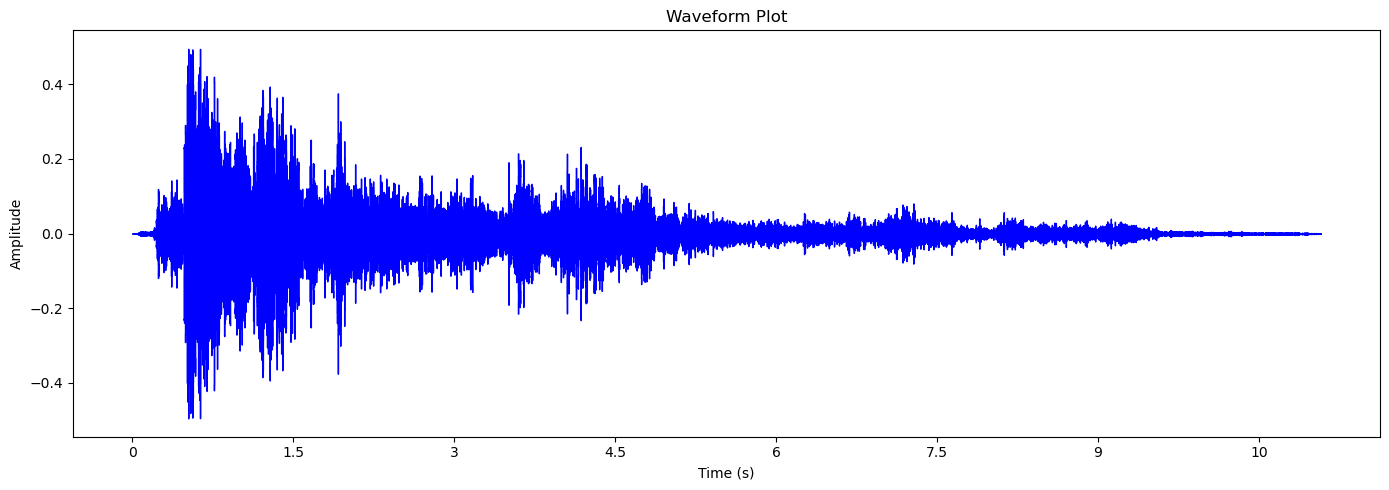

In [11]:
import librosa.display
import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio


# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
audio_file =  'thunder_test.wav'
    

samples, sample_rate = librosa.load(audio_file) 

#If samples are not already, convert to np.array, can probably be simpflified, no need for if check
if not isinstance(samples, np.ndarray):
    samples = np.array(samples)


plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sample_rate, color='b') #color specification needed due to version incompatibility problems btw librosa and matplotlib
plt.title('Waveform Plot')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.tight_layout()




In [12]:
# Listen to the audio 
Audio(audio_file)


C:\Users\matthias\AppData\Local\Temp\ipykernel_3712\2304845838.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


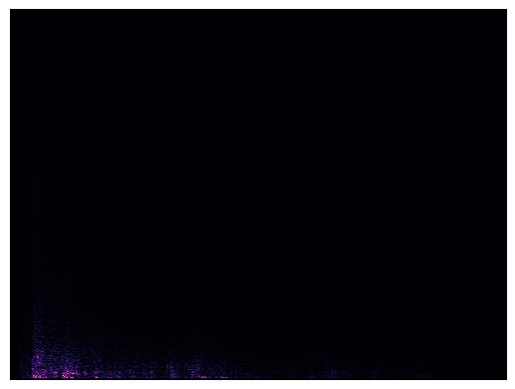

In [13]:
#Apply fourier transformation and plot 

sgram = librosa.stft(samples)
librosa.display.specshow(sgram)

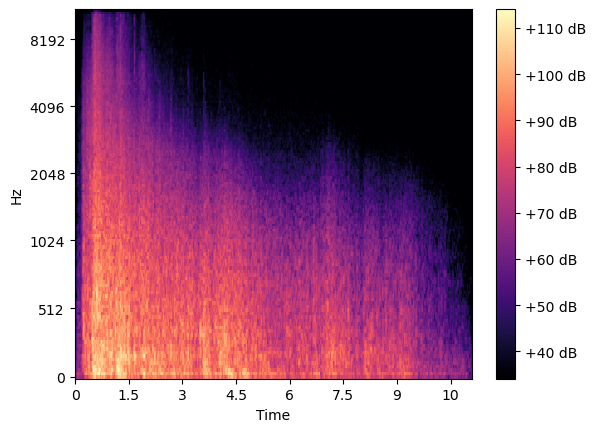

In [17]:
# Create a mel spectrogramm 
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
#librosa.display.specshow(mel_scale_sgram)

mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

## Create NNs